In [299]:
import numpy as np
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from IPython.display import Image
init_notebook_mode(connected=True)

In [5]:
boston_houses = load_boston()

In [6]:
column_names = np.append(boston_houses.feature_names, 'target')
boston_df = pd.DataFrame(data= np.c_[boston_houses['data'], boston_houses['target']],
                     columns=column_names)

## Boston House Prices dataset
===========================

### Data Set Characteristics:  

    Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000 dollars
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in 1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
http://archive.ics.uci.edu/ml/datasets/Housing

In [301]:
# compute pairwise pearson correlation of each feature and prices
for column_name in column_names[:-1]:
    correlation = boston_df[column_name].corr(boston_df['target'])
    if abs(correlation) >= 0.5:
        print(f'Correlation between {column_name} and Target')
        print(correlation)

Correlation between RM and Target
0.6953599470715394
Correlation between PTRATIO and Target
-0.5077866855375621
Correlation between LSTAT and Target
-0.7376627261740152


In [269]:
trace = go.Scatter(
    x = boston_df['LSTAT'],
    y = boston_df['target'],
    mode = 'markers'
)

data = [trace]

layout = go.Layout(
    title='Low income family rate vs House Prices',
    xaxis=dict(
        title='Low income family rate',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='House Prices',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

config={'showLink': False}
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-scatter', config=config)

## Linear Regression with One Variable

#### Pseudocode from Andrew Ng's Machine Learning Course

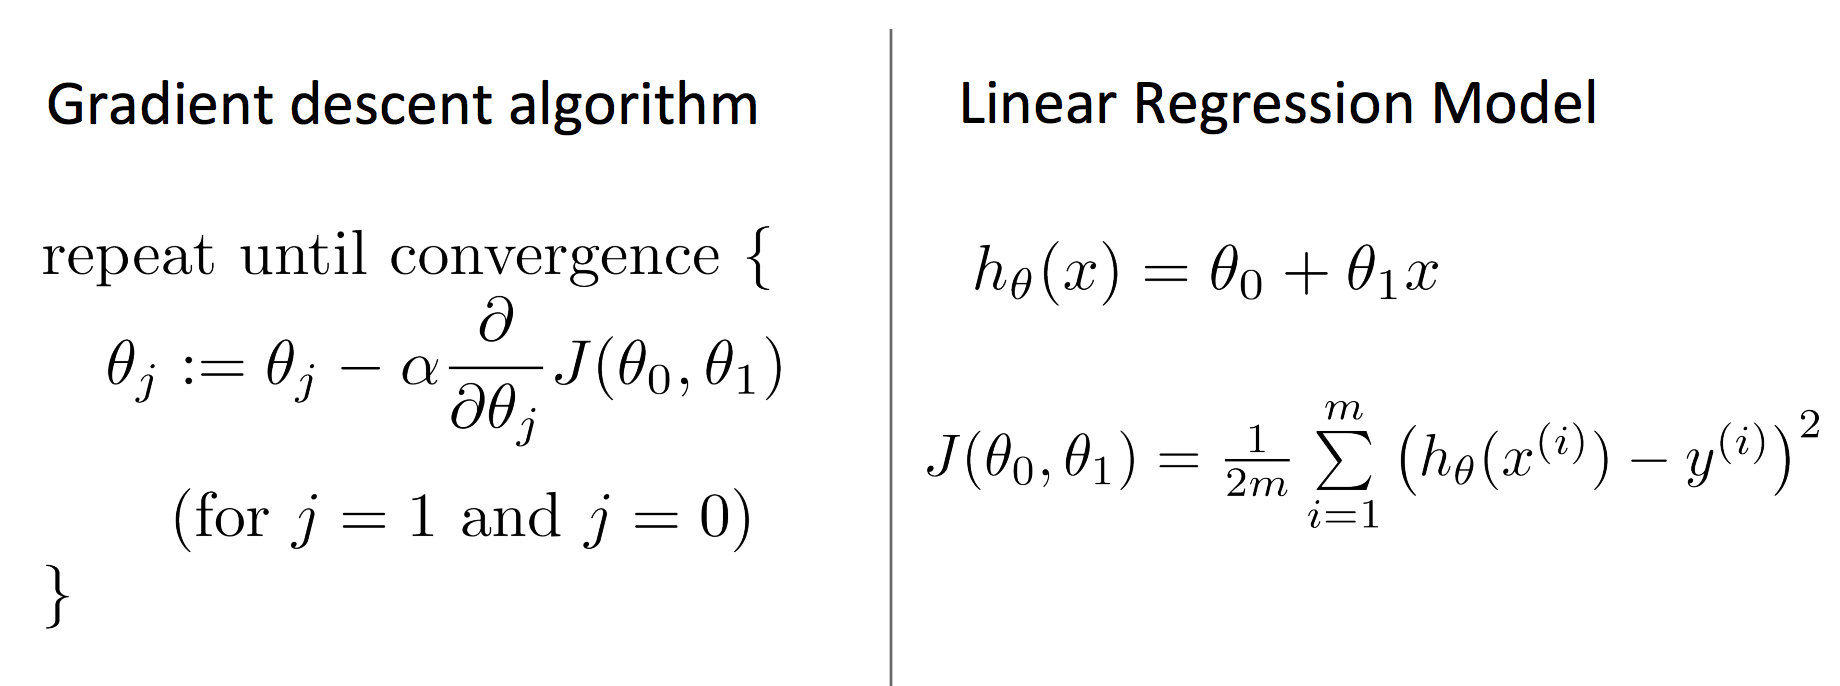

In [298]:
Image(filename="../imgs/lesson_1_linear_regression.png", width=700, height=400)

In [320]:
X = np.array(boston_df['LSTAT']).reshape(-1, 1)
ones = np.ones((len(X),1))
X = np.hstack((ones, X))
y = np.array(boston_df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
m = X_train.shape[0]

In [321]:
def cost_function(X, y, theta, deriv=False):
    hypothesis = X.dot(theta)
    error = hypothesis - y

    if deriv:
        gradient = (1/m) * X.T.dot(error)
        return gradient, error
    else:
        J = 1/(2*m) * error.dot(error)
        return J

In [322]:
def gradient_descent(X, y, alpha, epochs, batch_size, theta):
    theta_list  = []
    cost_list   = []
    
    for epoch_num in range(epochs):
        cost = cost_function(X, y, theta)
        cost_list.append(cost)
        theta_list.append(theta)
        
        gradient, error = cost_function(X, y, theta, deriv=True)
        theta = theta - alpha * gradient
        
        if epoch_num % 1000 == 0:
            print(f"cost: {cost}")
            
    return cost_list, theta_list

In [323]:
# randomly initialize theta
theta = np.array([1, -0.5])
alpha = 0.001
epochs = 10000
batch_size = X_train.shape[0] # batch gradient descent
cost_list, theta_list = gradient_descent(X_train, y_train, 
                                         alpha, epochs, batch_size, theta)

cost: 414.26212249381183
cost: 103.45664704319088
cost: 71.75238463901698
cost: 51.99252252661983
cost: 39.67707592441321
cost: 32.001403687983746
cost: 27.2174972504748
cost: 24.235900316955192
cost: 22.3776030467012
cost: 21.219408689237483


In [331]:
final_theta = theta_list[-1]
print(final_theta)

[31.6606339  -0.77952491]


In [ ]:
## TODO Create animation for updated line and contour plots

## Linear Regression with Multiple Variables

In [325]:
# combine top three correlated features
# complete algorithm
lstat = np.array(boston_df['LSTAT']).reshape(-1, 1)
full_set_size = lstat.shape[0]
ones = np.ones((full_set_size,1))
pupil_teacher_ratio = np.array(boston_df['PTRATIO']).reshape(-1, 1)
rooms = np.array(boston_df['RM']).reshape(-1, 1)
X_multi = np.hstack((ones, lstat, pupil_teacher_ratio, rooms))
y_multi = np.array(boston_df['target'])

In [326]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.20, random_state=42)
m = X_train_multi.shape[0]

## Gradient Descent Approach

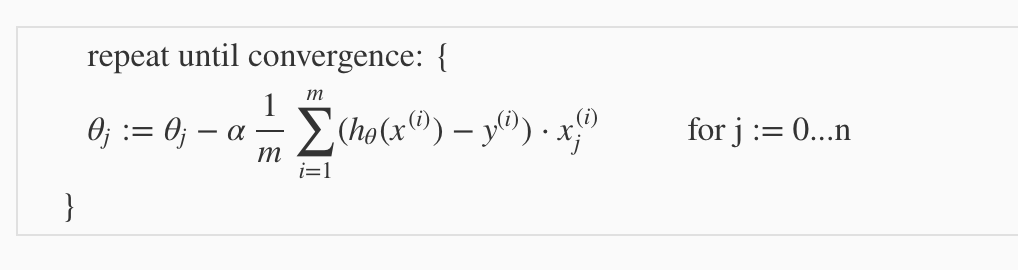

In [346]:
Image(filename="../imgs/lesson_1_multi_variable_linear_regression.png", width=700, height=400)

In [337]:
# randomly initialize theta
theta_multi = np.array([1, -0.7, -0.5, 0.7])
alpha_multi = 0.001
epochs_multi = 10000
batch_size_multi = m # batch gradient descent
cost_multi_list, theta_multi_list = gradient_descent(X_train_multi, y_train_multi, 
                                         alpha_multi, epochs_multi, batch_size_multi, theta_multi)

cost: 265.4796045793787
cost: 44.34420056368426
cost: 17.140334193565337
cost: 13.50283102976024
cost: 13.007185153889072
cost: 12.938585256944277
cost: 12.928726034642814
cost: 12.927159941116363
cost: 12.926849613106219
cost: 12.926764453876727


In [330]:
final_theta_multi = theta_multi_list[-1]
print(final_theta_multi)

[ 2.04801055 -0.50381761 -0.65300886  6.17587267]


# Feature Scaling


In [333]:
from sklearn.preprocessing import StandardScaler

lstat_scaler = StandardScaler()
ptratio_scaler = StandardScaler()
rm_scaler = StandardScaler()
print(lstat_scaler)

lstat_scaled = lstat_scaler.fit_transform(lstat)
full_set_size = lstat.shape[0]
ones = np.ones((full_set_size,1))
pupil_teacher_ratio_scaled = ptratio_scaler.fit_transform(pupil_teacher_ratio)
rooms_scaled = rm_scaler.fit_transform(rooms)
X_multi_normalized = np.hstack((ones, lstat_scaled, pupil_teacher_ratio_scaled, rooms_scaled))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [334]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi_normalized, y_multi, test_size=0.20, random_state=42)
m = X_train_multi.shape[0]

In [347]:
y_train_multi.shape

(404,)

In [339]:
# randomly initialize theta
theta_multi = np.array([1, -0.7, -0.5, 0.7])
alpha_multi = 0.001
epochs_multi = 10000
batch_size_multi = m # batch gradient descent
cost_multi_list, theta_multi_list = gradient_descent(X_train_multi, y_train_multi, 
                                         alpha_multi, epochs_multi, batch_size_multi, theta_multi)

cost: 265.4796045793787
cost: 44.34420056368426
cost: 17.140334193565337
cost: 13.50283102976024
cost: 13.007185153889072
cost: 12.938585256944277
cost: 12.928726034642814
cost: 12.927159941116363
cost: 12.926849613106219
cost: 12.926764453876727


In [340]:
final_theta_multi = theta_multi_list[-1]
print(final_theta_multi)

[22.48285741 -4.02720936 -2.07026507  3.34308824]


## Normal Equation
You can also use the normal equation instead of gradient descent to avoid the iterations and get the final theta list in one go.
This works best when there are fewer n features than m training examples because the computation cost can get expensive as n increases. O(n^3)

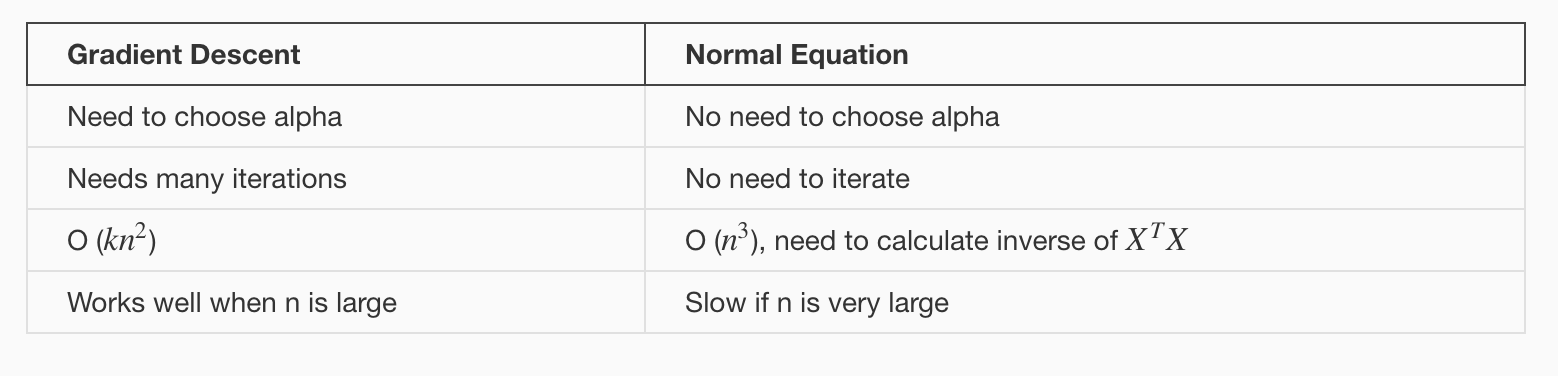

In [345]:
Image(filename="../imgs/lesson_1_gd_vs_ne.png", width=1000, height=700)

In [342]:
final_theta_list = np.linalg.inv(X_train_multi.T.dot(X_train_multi)).dot(X_train_multi.T).dot(y_train_multi)

In [343]:
final_theta_list

array([22.48381006, -4.03547191, -2.06881654,  3.33622022])

### Citations
Images from Ng, A. Machine Learning. Retrieved from https://www.coursera.org/learn/machine-learning